<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>

# Canny - Create
<a href="https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/Canny/Canny_Create.ipynb" target="_parent">
<img src="https://img.shields.io/badge/-Open%20in%20Naas-success?labelColor=000000&logo="/>
</a>

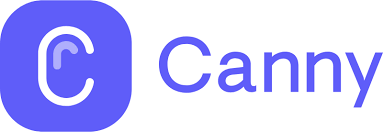

## Enter credentials

In [1]:
import requests
import json
import pandas as pd

In [2]:
canny_api = "**********"                             # api key of canny
post_title = "Post title"                            # Enter post title                    
post_body = "Post body using canny api"              # Enter post body

## Board dataframe using api-key

In [8]:
api_key = {
"apiKey":canny_api          
}
limit = {
"limit":"100"                          
}
response = requests.get("https://canny.io/api/v1/boards/list")
response = requests.post("https://canny.io/api/v1/boards/list", api_key)
post_details = response.json()
db = post_details['boards']
df = pd.DataFrame(columns = db[0].keys()) 
for i in range(len(db)):
    df = df.append(db[i], ignore_index=True)
df = df[['name','id']]
board_list = df.rename(columns={'name': 'BOARD_NAME', 'id': 'BOARD_ID'})
board_list

## Enter board name

In [4]:
board_name = "Requests"      #Enter board name
for i in range(len(board_list)):
    if board_list['BOARD_NAME'][i] == board_name:
        board_id = board_list['BOARD_ID'][i]
board_id
board_id = {
"boardID":board_id                          
}

## Using api and board name to get author list

In [9]:
response = requests.get("https://canny.io/api/v1/posts/list")
data = {**api_key, **board_id, **limit}
response = requests.post("https://canny.io/api/v1/posts/list", data)
post_details = response.json()
# post_details['posts']
author_list = pd.DataFrame()
for i in range(len(post_details['posts'])):
    author_list = author_list.append(post_details['posts'][i]['author'], ignore_index=True)
author_list.drop_duplicates(subset ="email", keep = False, inplace = True)
author_list = author_list[['name','id']]
author_list = author_list.rename(columns={'name': 'AUTHOR_NAME', 'id': 'AUTHOR_ID'})
author_list

## Enter author name

In [6]:
author_name = "Sanjay Sabu"  #Enter author name
for i in author_list['AUTHOR_NAME'].index:
    if author_list['AUTHOR_NAME'][i] == author_name:
        author_id = author_list['AUTHOR_ID'][i]
author_id = {
"authorID":author_id                          
}

## Creating post

In [7]:
post_title = {
"title":post_title                                    
}
post_body = {
"details":post_body                    
}
data = {**api_key, **author_id, **board_id, **post_body, **post_title}
response = requests.post("https://canny.io/api/v1/posts/create", data)